# **Tame Your Python**

Let's see how we can classify emails based on their contents

`Leggo`


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

## Get the dataset

In [75]:
!wget http://cs.joensuu.fi/sipu/datasets/s1.txt
!ls

--2020-05-29 10:32:00--  http://cs.joensuu.fi/sipu/datasets/s1.txt
Resolving cs.joensuu.fi (cs.joensuu.fi)... 193.167.239.10
Connecting to cs.joensuu.fi (cs.joensuu.fi)|193.167.239.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105000 (103K) [text/plain]
Saving to: ‘s1.txt.2’

s1.txt.2            100%[===================>] 102.54K   259KB/s    in 0.4s    

2020-05-29 10:32:01 (259 KB/s) - ‘s1.txt.2’ saved [105000/105000]

s1.txt	s1.txt.1  s1.txt.2  s4.txt  sample_data


In [76]:
!head s4.txt

    624474    837604
    673412    735362
    647442    677000
    532283    741384
    646529    742844
    647535    755101
    644131    777721
    521368    736923
    688940    798967
    592666    805244


In [77]:
X = pd.read_csv('s1.txt', delimiter='    ', header=None)
print(X.shape)

(5000, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [78]:
X.head()
print(X.shape)

(5000, 2)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

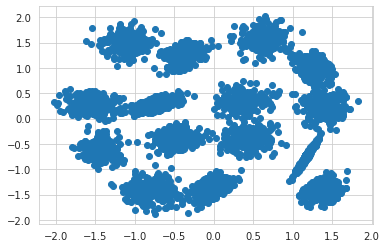

In [80]:
plt.scatter(X[:,0], X[:,1])
plt.show()

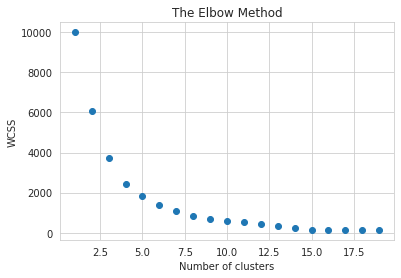

<Figure size 432x288 with 0 Axes>

In [81]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.scatter(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.clf()


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.1)

In [0]:
# Fitting K-Means to the dataset
cluster_object = KMeans(n_clusters = 8, init = 'k-means++')
y_pred = cluster_object.fit_predict(X_train)

In [84]:
clusters = np.unique(y_pred)
print(clusters)

[0 1 2 3 4 5 6 7]


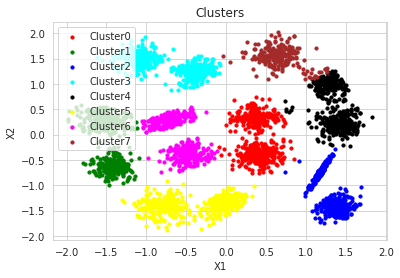

In [85]:
# Visualising the clusters
colors = ['red', 'green', 'blue', 'cyan', 'black', 'yellow', 'magenta', 'brown', 'orange']
for i in np.unique(y_pred):
  plt.scatter(X_train[y_pred == i, 0], X_train[y_pred == i, 1], s = 10, c = colors[i], label = 'Cluster' + str(i))
  #plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 10, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()